In [1]:
import 定日镜光学效率 as eff
import pandas as pd
import numpy as np
import test_multi
import e_mirror_rate as emr

In [2]:
#读取 附件.xlsx 中的数据
df = pd.read_excel('附件.xlsx',header=0)
df.head()

,x坐标 (m),y坐标 (m)
0,107.250,11.664
1,105.360,23.191
2,102.235,34.447
3,97.911,45.299
4,92.440,55.619


In [3]:
#加入额外数据
#安装高度
df['安装高度z'] = 4
#尺寸
df['尺寸长l'] = 6
df['尺寸宽w'] = 6

df.head()

,x坐标 (m),y坐标 (m),安装高度z,尺寸长l,尺寸宽w
0,107.250,11.664,4,6,6
1,105.360,23.191,4,6,6
2,102.235,34.447,4,6,6
3,97.911,45.299,4,6,6
4,92.440,55.619,4,6,6


In [4]:
#转换为nddarray
mirrors = df.values
mirrors

array([[107.25 ,  11.664,   4.   ,   6.   ,   6.   ],
       [105.36 ,  23.191,   4.   ,   6.   ,   6.   ],
       [102.235,  34.447,   4.   ,   6.   ,   6.   ],
       ...,
       [334.636, -40.95 ,   4.   ,   6.   ,   6.   ],
       [336.233, -24.609,   4.   ,   6.   ,   6.   ],
       [337.032,  -8.21 ,   4.   ,   6.   ,   6.   ]])

## 计算效率

In [5]:

result_matrix = test_multi.range_result(mirrors[:, 0:2],8)
#print(result_matrix)

In [6]:

Day=90
hour=15
phi=39.2*np.pi/180

ps,tal,per=eff.E_field(mirrors,result_matrix,Day,hour,phi,3)

print("总功率",tal)
print("单位面积功率",per)


投影后坐标 [[-8.35204696e-02  7.67967281e-01  8.48898337e+01]
 [ 2.37698998e-01 -2.18563251e+00  7.92158748e+01]
 [ 8.35204696e-02 -7.67967281e-01  7.51101663e+01]
 [-2.37698998e-01  2.18563251e+00  8.07841252e+01]]
x -0.8127189888914281 y -0.08838745255412231 mod 0.8175111599689099 cos 0.9941380970534225 sin 0.10811773206555823
旋转后的投影坐标 [[ 7.75768338e-15  7.72495575e-01  8.48898337e+01]
 [ 1.25177646e-14 -2.19852002e+00  7.92158748e+01]
 [ 2.08721929e-14 -7.72495575e-01  7.51101663e+01]
 [ 1.99840144e-15  2.19852002e+00  8.07841252e+01]]
area: 20.2893281813232
第 0 个镜子效率: {'eta': 0.8627900418388278, 'eta_cos': 0.9926163552794418, 'eta_at': 0.9780340506043553, 'eta_trunc': 0.9660106059978685, 'eta_sb': 1.0}
投影后坐标 [[-5.07303771e-02  2.30475293e-01  8.49454764e+01]
 [ 5.56680774e-01 -2.52907966e+00  7.89425764e+01]
 [ 5.07303771e-02 -2.30475293e-01  7.50545236e+01]
 [-5.56680774e-01  2.52907966e+00  8.10574236e+01]]
x -0.7983983076608908 y -0.17573704587095407 mod 0.8175104690260696 cos 0.9766

d:\python code\23cmfsh\ColumnProjection.py:44: RuntimeWarning: divide by zero encountered in scalar divide
  theta = np.arctan(plane_vector[1]/plane_vector[0])


第 230 个镜子效率: {'eta': 0.5524067980713581, 'eta_cos': 0.6163714436854559, 'eta_at': 0.9741563759451332, 'eta_trunc': 1.0000000000000002, 'eta_sb': 1.0}
投影后坐标 [[ 0.72318966 -3.54246186 81.79490257]
 [ 0.12076704 -0.59156355 76.01950762]
 [-0.72318966  3.54246186 78.20509743]
 [-0.12076704  0.59156355 83.98049238]]
x 0.8720038046249411 y 0.17801861075427705 mod 0.8899894724406886 cos 0.9797911454318398 sin 0.20002327697886416
旋转后的投影坐标 [[-1.21014310e-14 -3.61552753e+00  8.17949026e+01]
 [ 1.99840144e-14 -6.03764953e-01  7.60195076e+01]
 [ 1.21014310e-14  3.61552753e+00  7.82050974e+01]
 [ 9.29811783e-15  6.03764953e-01  8.39804924e+01]]
area: 30.95055811014986
第 231 个镜子效率: {'eta': 0.5519231302872287, 'eta_cos': 0.6164792053545233, 'eta_at': 0.9741564540894477, 'eta_trunc': 0.9989497066223582, 'eta_sb': 1.0}
投影后坐标 [[ 0.93838197 -3.23968019 82.86851588]
 [ 0.69496751 -2.39931344 76.49693726]
 [-0.93838197  3.23968019 77.13148412]
 [-0.69496751  2.39931344 83.50306274]]
x 0.8548510640639064 y 

In [7]:

#找到功率最小的镜子
min_index = np.argmin(ps)
print("最小功率镜子",min_index,ps[min_index],mirrors[min_index])


最小功率镜子 1683 16.62962568461198 [-333.539  -49.087    4.       6.       6.   ]


# 画图

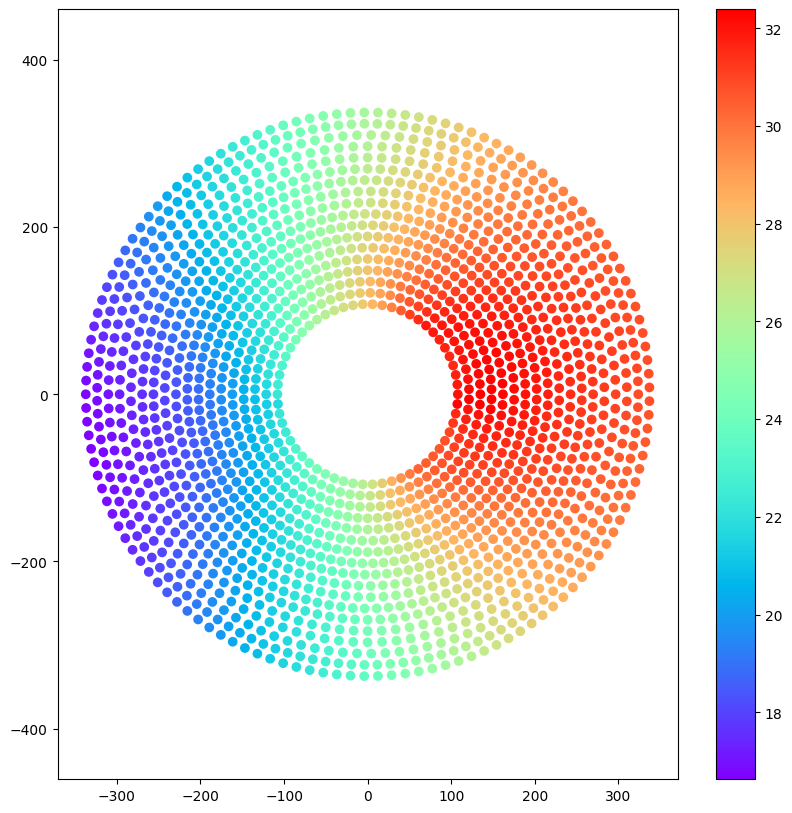

In [8]:
#import seaborn as sns
import matplotlib.pyplot as plt

#绘制功率密度图
#按镜子x,y坐标画出功率密度图
#x,y坐标
x = mirrors[:,0]
y = mirrors[:,1]
#功率密度
ps = ps
#绘图
plt.figure(figsize=(10,10))
plt.scatter(x,y,c=ps,cmap='rainbow')
plt.colorbar()
#等比
plt.axis('equal')
plt.show()
